<a href="https://colab.research.google.com/github/FernandoMay/Cajero-automatico/blob/master/IA_Hackathon_starter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hackathon at Semana Franco-Mexicana de IA

This notebook is intended to give a starting point for your own work, either in data storytelling or prediction. You can use this notebook from Gooogle Colab or locally in a jupyter server.

## Instructions for Google Colab

First, download the github repository. Only execute these lines **once**:

In [ ]:
!git clone https://github.com/jbhayet/semanaia-hackathon/

In [ ]:
%cd semanaia-hackathon

On Colab, you should have all of the necessary python packages already installed, so you can go directly to the "Loading the data" section.

## Instructions for local utilisation

To run this notebook locally, you should first download the repository through the Github interface or by doing the following in a shell like [bash for Linux](https://ubuntu.com/tutorials/command-line-for-beginners#1-overview) or [git for Windows](https://gitforwindows.org/):

```bash
git clone https://github.com/jbhayet/semanaia-hackathon/
cd semania-hackathon
```

Then you will need to install the python libraries for this repository. If you don't have a python environment installed, you can use [anaconda](https://www.anaconda.com/) to create one. Once you are in a python environment, you can install the libraries of this repository by doing:

```bash
pip install --upgrade pip
pip install -r requirements.txt
```

## Loading the data

We will first load some of the python packages we will use in this notebook. If this line doesn't work (it outputs an error), go back to one of the previous steps.

In [ ]:
import pandas as pd
import numpy as np
import ast
import matplotlib.pyplot as plt

Once the repository is downloaded and the python environment installed, you should load the data and check that it is valid. We will start with the training data from Mexico City:

In [ ]:
cdmx_file = 'data/cdmx_data_series.csv'
print(f"--- Reading train data from {cdmx_file}")
data_cdmx = pd.read_csv(cdmx_file)
print(f"--- Read {len(data_cdmx)} records")

We will look at the first few rows of the data in order to validate that they were properly loaded:

In [ ]:
data_cdmx.head()

Now we will load the data from Lyon in the same way:

In [ ]:
lyon_file = 'data/lyon_data_series.csv'
print(f"--- Reading train data from {lyon_file}")
data_lyon = pd.read_csv(lyon_file)
print(f"--- Read {len(data_lyon)} records")

In [ ]:
data_lyon.head()

As you can see, there is a different amount of data for Lyon and Mexico City, but they have the same fields. Your task is to explore or predict the different levels of station usage, which are represented as relative values from midnight each day in the `occupation_x` columns, where `x` is the hour. Depending on if you want to work on data storytelling or prediction, you can use the following sections as starting points.

## Data Storytelling

Data Storytelling is about understanding the data through visualizations and analysis. What trends do you see in the data? How can they be used to inform a decision? Are any of the data suspect or not complete? How could the dataset be improved? All of these questions can be answered through a full understanding of the data. Here is an example visualization to start with. This visualization shows the average value of occupation per hour, each day of the week in Lyon. Can you change this code to make the same visualization for Mexico City?

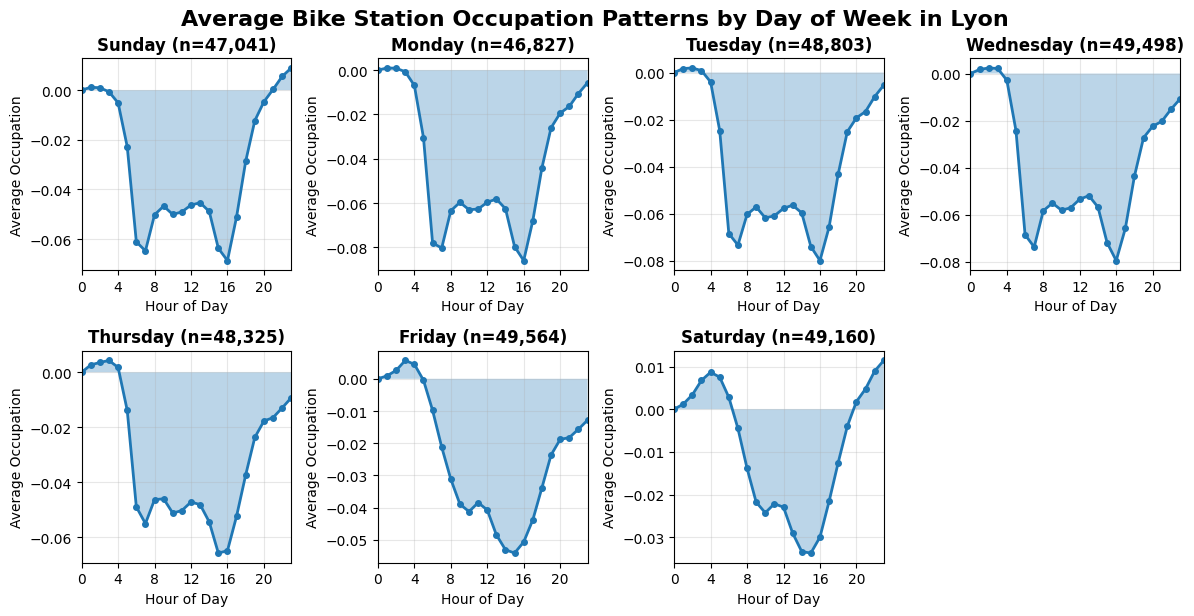

In [16]:
import seaborn as sns

# Define day names for better labels
day_names = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

# Create figure with subplots
fig, axes = plt.subplots(2, 4, figsize=(12, 6))  # 2x4 grid for 7 days + 1 empty
axes = axes.flatten()  # Flatten for easier indexing

# Hide the 8th subplot since we only have 7 days
axes[7].set_visible(False)

# Create occupation columns list
occupation_cols = [f'occupation_{i}' for i in range(24)]

# Process each day of the week
for day in range(7):
    # Filter data for this specific weekday
    day_data = data_lyon[data_lyon['weekday'] == day]

    if len(day_data) == 0:
        axes[day].text(0.5, 0.5, f'No data for {day_names[day]}',
                      ha='center', va='center', transform=axes[day].transAxes)
        axes[day].set_title(f'{day_names[day]} (No Data)')
        continue

    # Calculate average occupation for each hour
    hourly_avg = day_data[occupation_cols].mean()

    # Create the plot
    hours = range(24)
    axes[day].plot(hours, hourly_avg.values, marker='o', linewidth=2, markersize=4)
    axes[day].set_title(f'{day_names[day]} (n={len(day_data):,})', fontsize=12, fontweight='bold')
    axes[day].set_xlabel('Hour of Day')
    axes[day].set_ylabel('Average Occupation')
    axes[day].grid(True, alpha=0.3)
    axes[day].set_xlim(0, 23)
    axes[day].set_xticks(range(0, 24, 4))  # Show every 4 hours

    # Add some styling
    axes[day].fill_between(hours, hourly_avg.values, alpha=0.3)

plt.tight_layout()
plt.suptitle('Average Bike Station Occupation Patterns by Day of Week in Lyon',
              fontsize=16, fontweight='bold', y=1.02);

To go further, look at the `generate_zones.py` notebook, which loads the geographic data. The different areas have very different bike uses, so visualizing these data on a map can give much better understanding.

## Prediction

For the prediction task, we

In [17]:
current_hour = 15
df = data_lyon

# Define features: static info + weather + previous occupation levels
feature_cols = [
    'lon', 'lat', 'zone_id',           # Location features
    'tmin', 'tmax', 'prcp', 'wspd',    # Weather features
    'weekday', 'holiday'               # Time features
]

# Add previous occupation levels (from hour 0 to current_hour)
prev_occupation_cols = [f'occupation_{i}' for i in range(current_hour + 1)]
feature_cols.extend(prev_occupation_cols)

# Target: next 3 hours of occupation
target_cols = [f'occupation_{current_hour + i}' for i in range(1, 4)]

# Create feature matrix and target matrix
X = df[feature_cols].copy()
y = df[target_cols].copy()

# Add hour of day as feature
X['current_hour'] = current_hour

print(f"Dataset shape: {X.shape[0]} samples, {X.shape[1]} features")
print(f"Predicting hours {current_hour+1}, {current_hour+2}, {current_hour+3}")

Dataset shape: 339218 samples, 26 features
Predicting hours 16, 17, 18


We will separate the data into two parts: a training dataset to train the model, and a test dataset to evaluate the model.

In [ ]:
from sklearn.model_selection import train_test_split
# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Training dataset shape: {X_train.shape[0]} samples, {X_train.shape[1]} features")
print(f"Test dataset shape: {X_test.shape[0]} samples, {X_test.shape[1]} features")

Now that we have defined our input data `X` and our target `y`, and split them into training and test data, we can train a machine learning model on the training data to predict the target.

In [20]:
# Train model (MultiOutputRegressor handles multiple targets)
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor

model = MultiOutputRegressor(
    RandomForestRegressor(
        n_estimators=10,
        max_depth=3,
        random_state=42,
        n_jobs=-1
    )
)

print("Training model...")
model.fit(X_train, y_train)

Training model...


MultiOutputRegressor(estimator=RandomForestRegressor(max_depth=3,
                                                     n_estimators=10, n_jobs=-1,
                                                     random_state=42))

Finally, we will evaluate the model on the test data. Here we evaluate the model using the Mean Absolute Error and the R2 score.

In [21]:
from sklearn.metrics import mean_absolute_error, r2_score

# Evaluate
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nModel Performance:")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"R² Score: {r2:.4f}")


Model Performance:
Mean Absolute Error: 0.2039
R² Score: 0.8050


To go further, apply your model to the data in Mexico City. Does it work as well? Then, consider your prediciton model's data. Does it work for hours besides 3pm? Try training it so that it can predict any 3 hour period, not just from 3pm.

México Storytelling

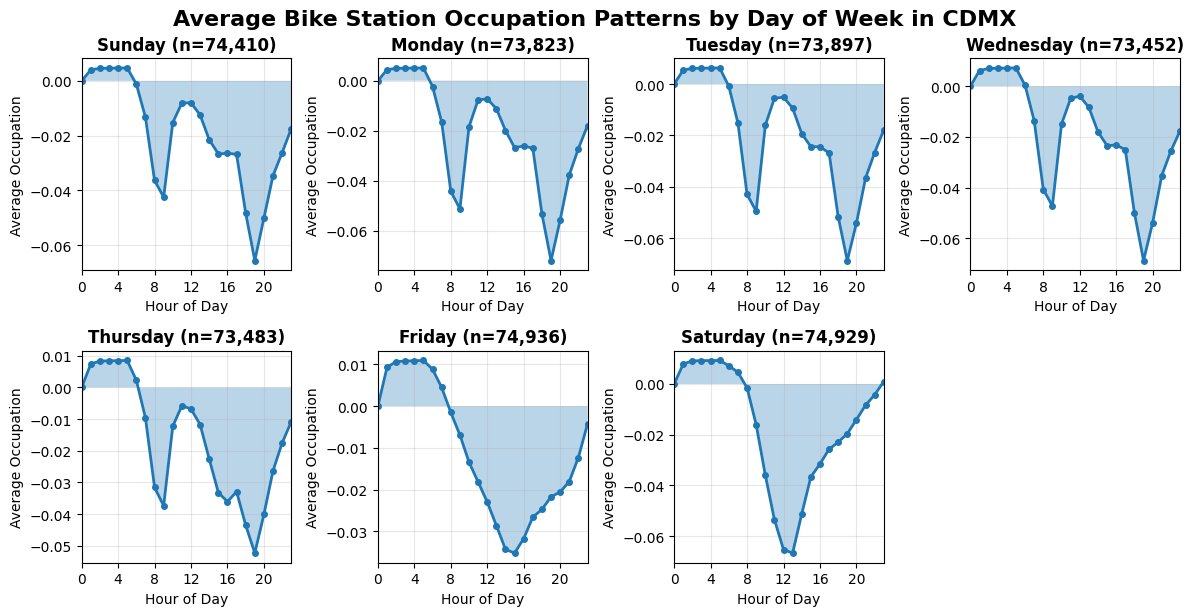

In [22]:
import seaborn as sns

# Define day names for better labels
day_names = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

# Create figure with subplots
fig, axes = plt.subplots(2, 4, figsize=(12, 6))  # 2x4 grid for 7 days + 1 empty
axes = axes.flatten()  # Flatten for easier indexing

# Hide the 8th subplot since we only have 7 days
axes[7].set_visible(False)

# Create occupation columns list
occupation_cols = [f'occupation_{i}' for i in range(24)]

# Process each day of the week
for day in range(7):
    # Filter data for this specific weekday
    day_data = data_cdmx[data_cdmx['weekday'] == day]

    if len(day_data) == 0:
        axes[day].text(0.5, 0.5, f'No data for {day_names[day]}',
                      ha='center', va='center', transform=axes[day].transAxes)
        axes[day].set_title(f'{day_names[day]} (No Data)')
        continue

    # Calculate average occupation for each hour
    hourly_avg = day_data[occupation_cols].mean()

    # Create the plot
    hours = range(24)
    axes[day].plot(hours, hourly_avg.values, marker='o', linewidth=2, markersize=4)
    axes[day].set_title(f'{day_names[day]} (n={len(day_data):,})', fontsize=12, fontweight='bold')
    axes[day].set_xlabel('Hour of Day')
    axes[day].set_ylabel('Average Occupation')
    axes[day].grid(True, alpha=0.3)
    axes[day].set_xlim(0, 23)
    axes[day].set_xticks(range(0, 24, 4))  # Show every 4 hours

    # Add some styling
    axes[day].fill_between(hours, hourly_avg.values, alpha=0.3)

plt.tight_layout()
plt.suptitle('Average Bike Station Occupation Patterns by Day of Week in CDMX',
              fontsize=16, fontweight='bold', y=1.02);

México Prediction

In [23]:
current_hour = 15
df = data_cdmx

# Define features: static info + weather + previous occupation levels
feature_cols = [
    'lon', 'lat', 'zone_id',           # Location features
    'tmin', 'tmax', 'prcp', 'wspd',    # Weather features
    'weekday', 'holiday'               # Time features
]

# Add previous occupation levels (from hour 0 to current_hour)
prev_occupation_cols = [f'occupation_{i}' for i in range(current_hour + 1)]
feature_cols.extend(prev_occupation_cols)

# Target: next 3 hours of occupation
target_cols = [f'occupation_{current_hour + i}' for i in range(1, 4)]

# Create feature matrix and target matrix
X = df[feature_cols].copy()
y = df[target_cols].copy()

# Add hour of day as feature
X['current_hour'] = current_hour

print(f"Dataset shape: {X.shape[0]} samples, {X.shape[1]} features")
print(f"Predicting hours {current_hour+1}, {current_hour+2}, {current_hour+3}")

Dataset shape: 518930 samples, 26 features
Predicting hours 16, 17, 18


Training dataset

In [24]:
from sklearn.model_selection import train_test_split
# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Training dataset shape: {X_train.shape[0]} samples, {X_train.shape[1]} features")
print(f"Test dataset shape: {X_test.shape[0]} samples, {X_test.shape[1]} features")

Training dataset shape: 415144 samples, 26 features
Test dataset shape: 103786 samples, 26 features


Train model (MultiOutputRegressor handles multiple targets)

In [25]:
# Train model (MultiOutputRegressor handles multiple targets)
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor

model = MultiOutputRegressor(
    RandomForestRegressor(
        n_estimators=10,
        max_depth=3,
        random_state=42,
        n_jobs=-1
    )
)

print("Training model...")
model.fit(X_train, y_train)

Training model...


MultiOutputRegressor(estimator=RandomForestRegressor(max_depth=3,
                                                     n_estimators=10, n_jobs=-1,
                                                     random_state=42))

Evaluating Model

In [26]:
from sklearn.metrics import mean_absolute_error, r2_score

# Evaluate
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nModel Performance:")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"R² Score: {r2:.4f}")


Model Performance:
Mean Absolute Error: 0.2039
R² Score: 0.8050
